In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [34]:
dataset = pd.read_csv("datasets/ashtma.csv")

In [35]:
df = dataset.copy()
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [36]:
df.drop("Severity_Mild", axis=1, inplace=True)

In [37]:
df.drop("Severity_Moderate", axis=1, inplace=True)

In [38]:
df.rename(columns={"Severity_None":"Target"}, inplace = True)

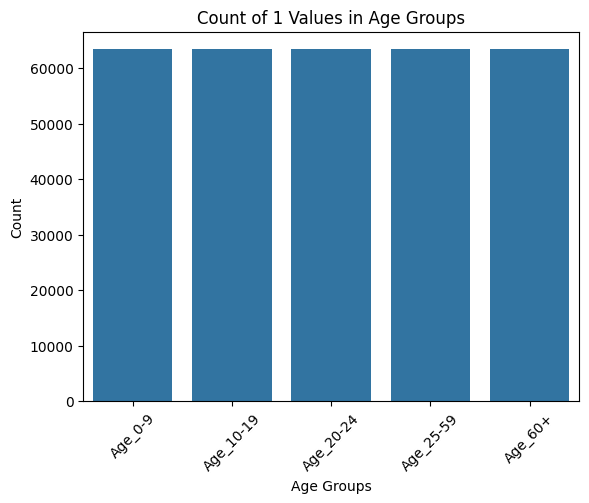

In [39]:
long_df = df.melt(value_vars=["Age_0-9", "Age_10-19", "Age_20-24", "Age_25-59", "Age_60+"], 
                  var_name="Age_Group", 
                  value_name="Value")

filtered_long_df = long_df[long_df["Value"] == 1]

sns.countplot(data=filtered_long_df, x="Age_Group")

plt.title("Count of 1 Values in Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Gender_Male', ylabel='count'>

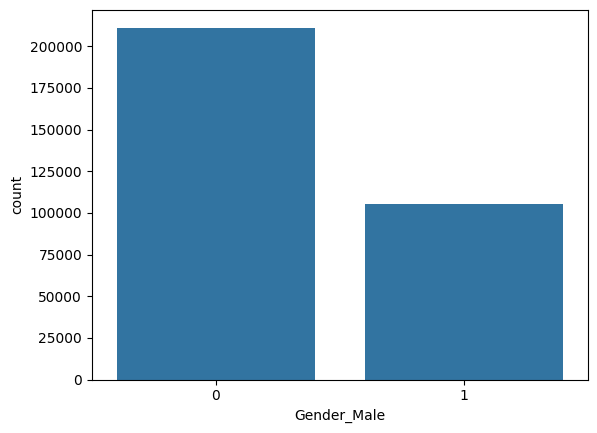

In [40]:
sns.countplot(data=df, x="Gender_Male")

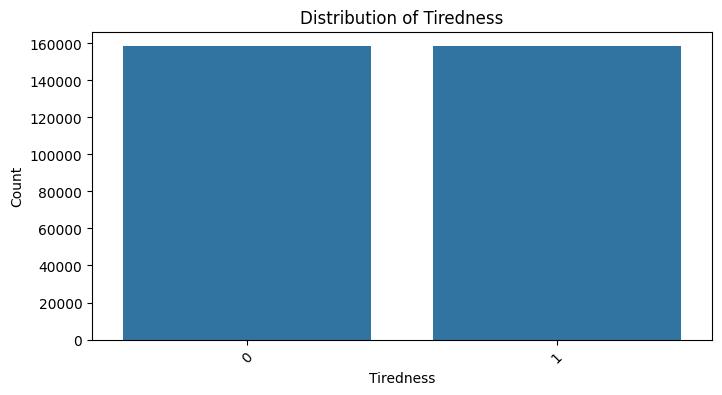

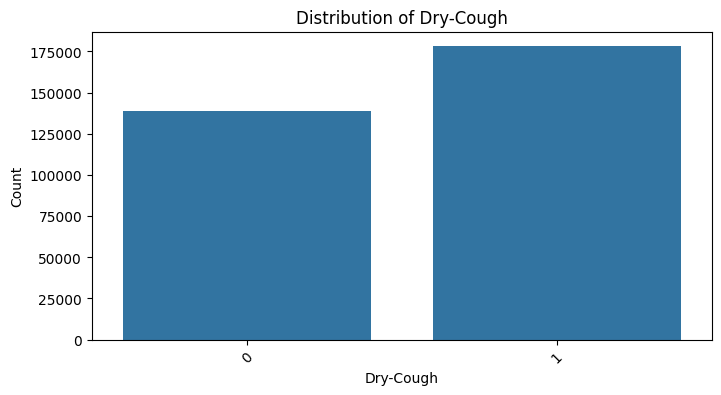

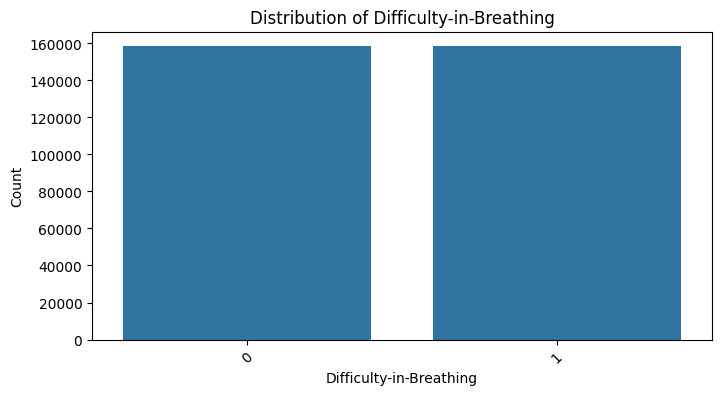

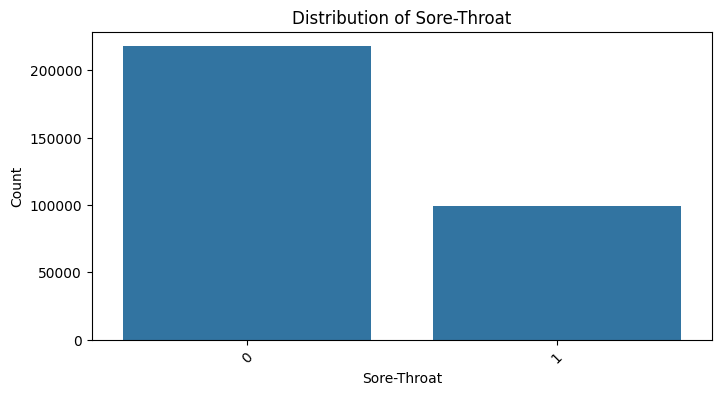

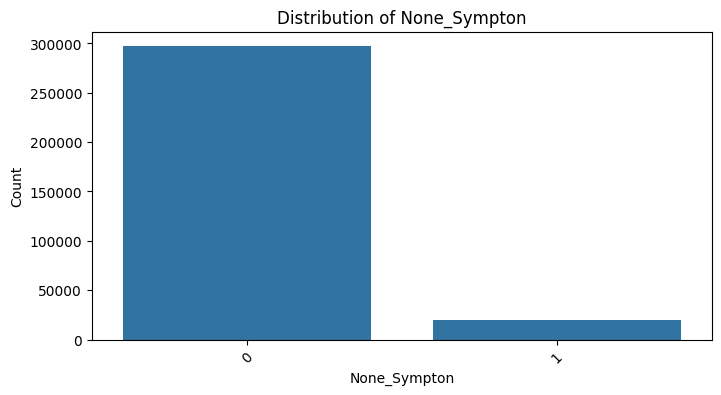

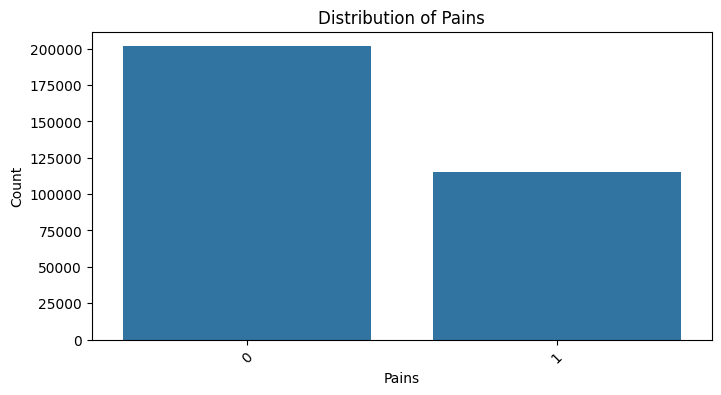

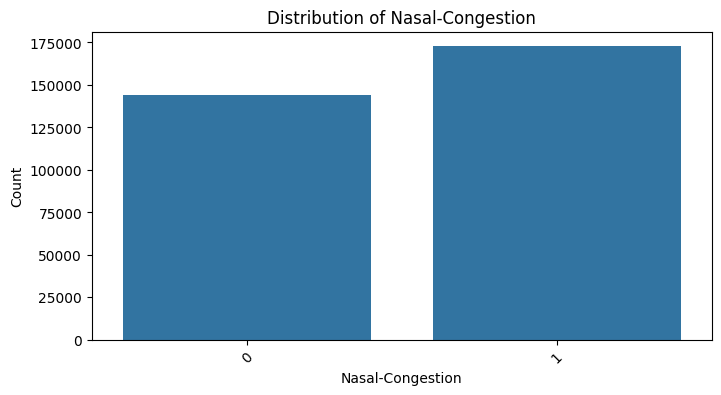

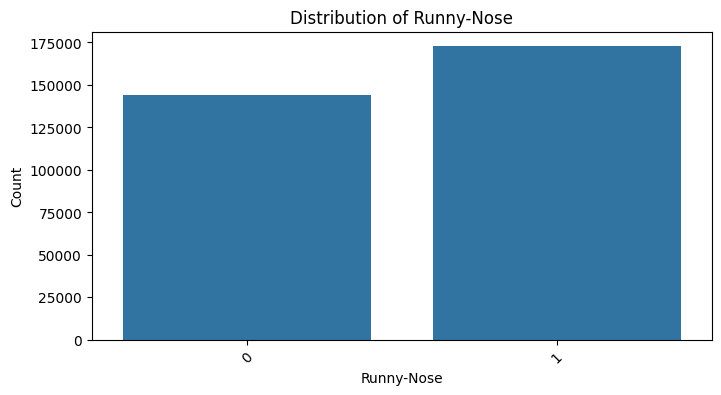

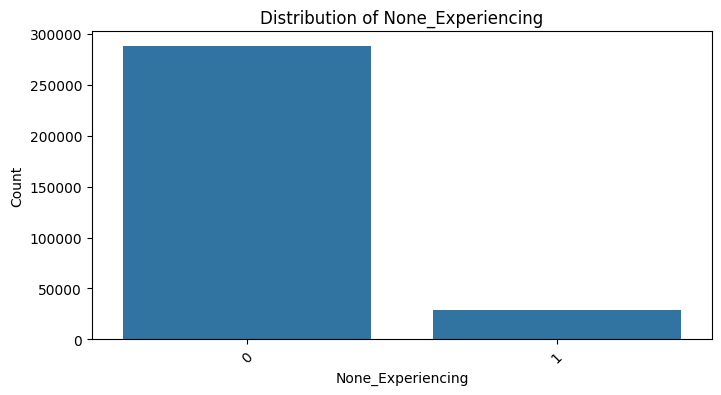

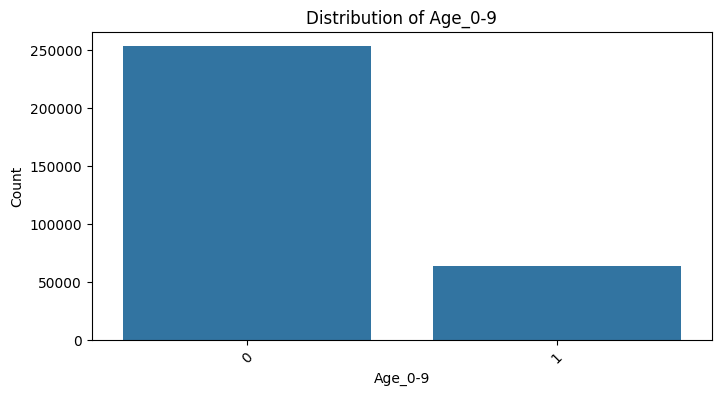

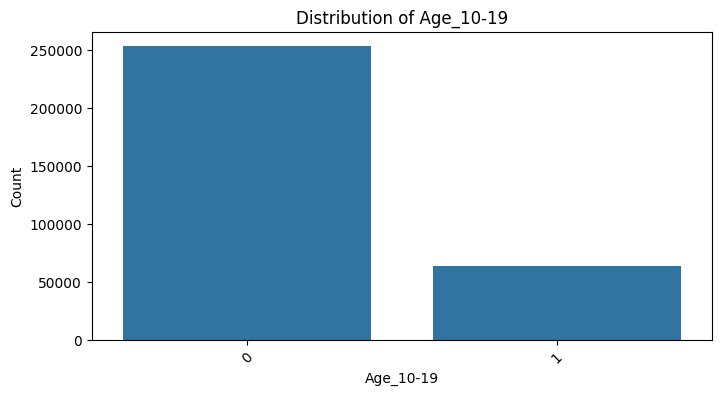

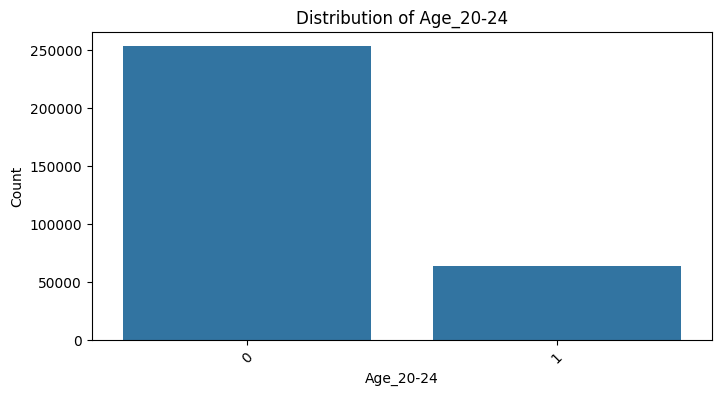

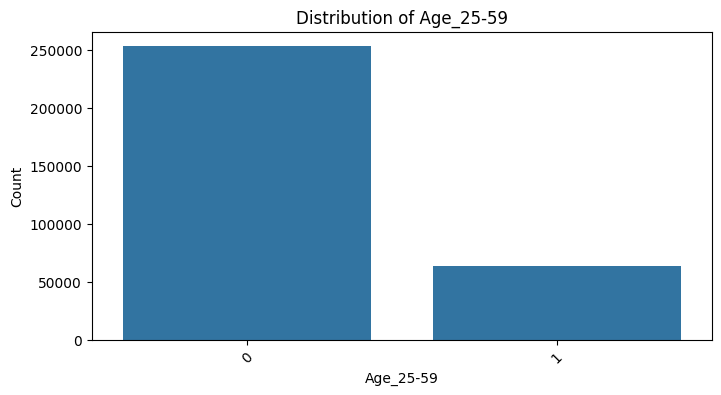

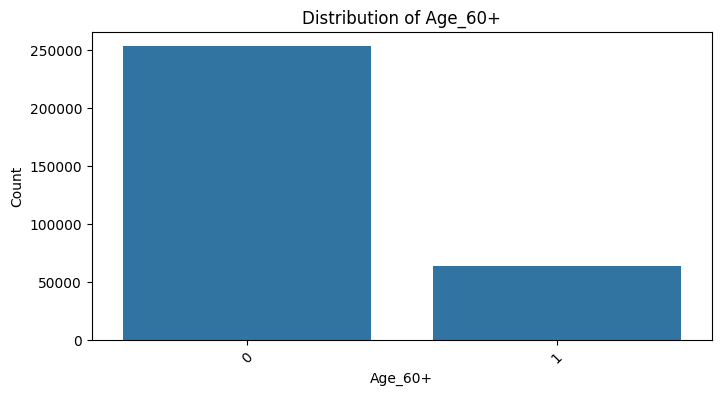

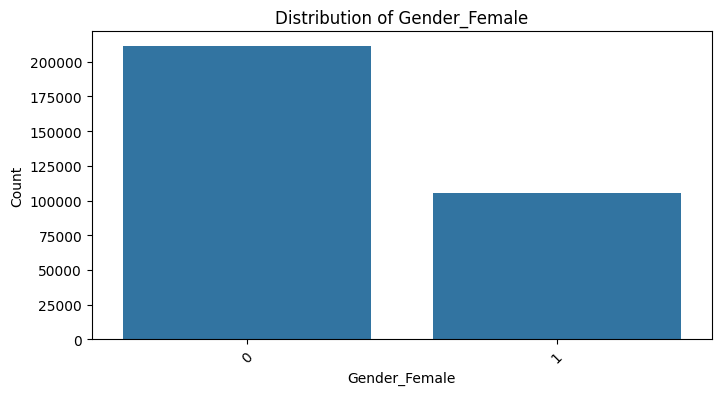

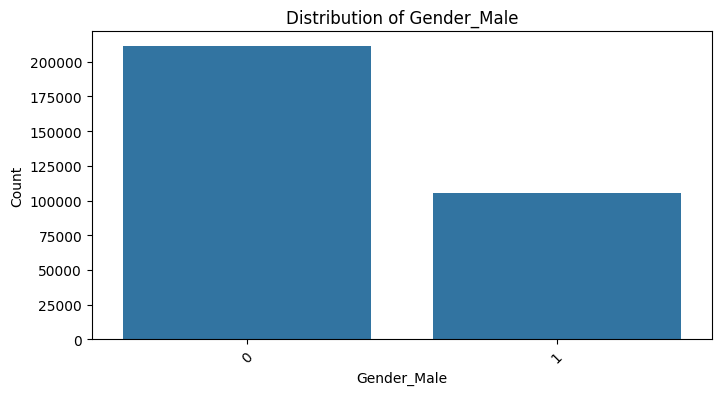

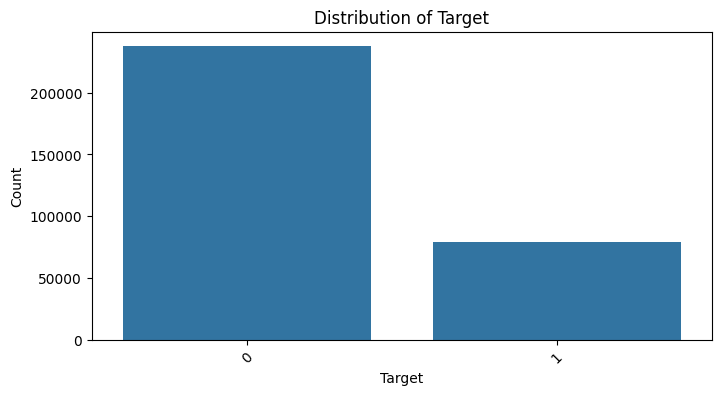

In [41]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

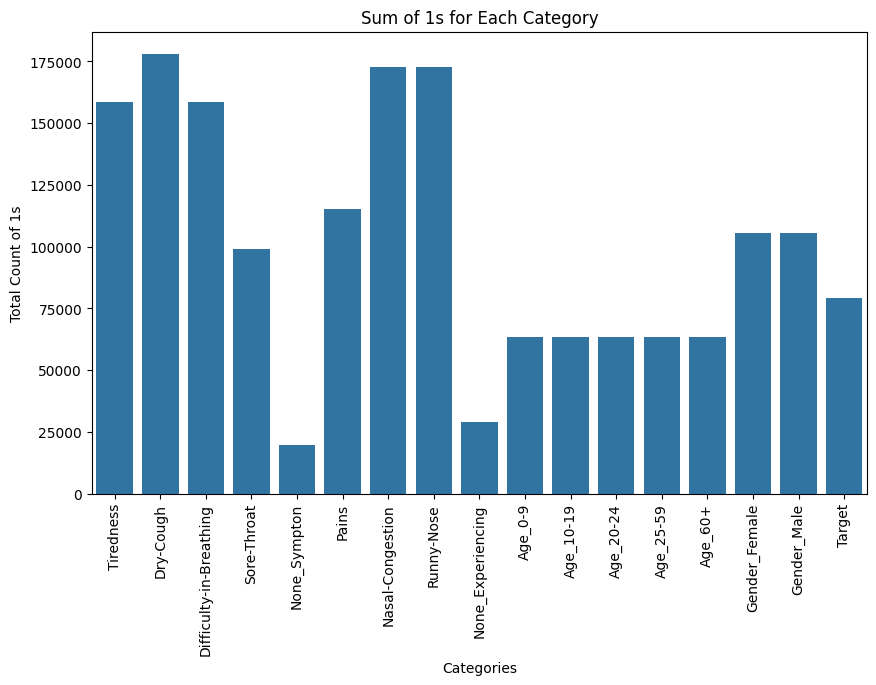

In [42]:
category_sums = df.sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sums.index, y=category_sums.values)
plt.title("Sum of 1s for Each Category")
plt.xlabel("Categories")
plt.ylabel("Total Count of 1s")
plt.xticks(rotation=90)
plt.show()


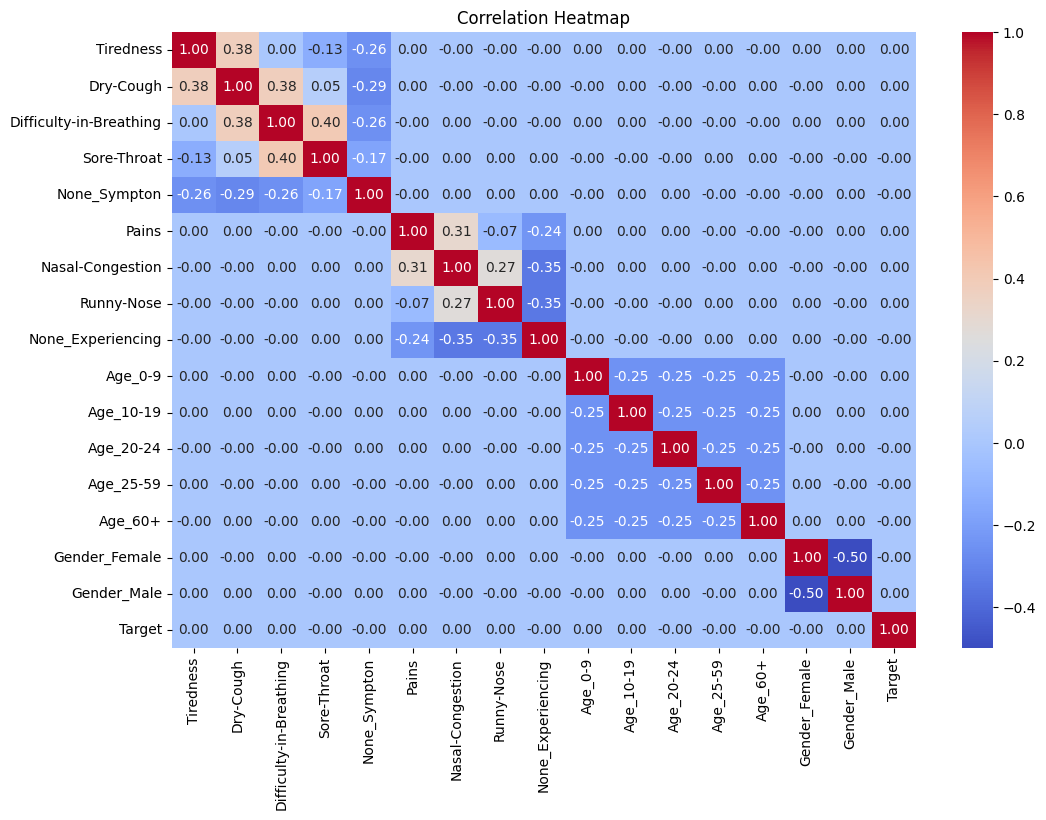

In [43]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [44]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Target
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [45]:
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
models_and_parameters = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 6, 9],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    }
}

best_models = {}
results = []

for name, mp in models_and_parameters.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(mp["model"], mp["params"], cv=3, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    best_models[name] = best_model
    results.append({
        "Model": name,
        "Best Params": best_params,
        "Validation Accuracy": best_score,
        "Test Accuracy": test_accuracy
    })

    print(f"Best params for {name}: {best_params}")
    print(f"Validation Accuracy: {best_score:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
results_df = pd.DataFrame(results)
print(results_df)

Running GridSearchCV for RandomForest...
Best params for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Validation Accuracy: 0.7497, Test Accuracy: 0.7513
Running GridSearchCV for XGBoost...


c:\Users\imfurkaann\Documents\projects\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Validation Accuracy: 0.7497, Test Accuracy: 0.7513
          Model                                        Best Params  \
0  RandomForest  {'max_depth': None, 'min_samples_split': 2, 'n...   
1       XGBoost  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   

   Validation Accuracy  Test Accuracy  
0             0.749673        0.75131  
1             0.749673        0.75131  


In [48]:
import pickle
with open('models/model_ashtma.pkl', 'wb') as f:
    pickle.dump(best_model, f)